In [1]:
from pprint import pprint
import time
import requests
import pandas as pd
from config import rapidapi_key
#from datetime import datetime
import matplotlib.pyplot as plt
import datetime
import math
import numpy as np
import scipy.stats as st

## Italy Index

In [2]:
italy_df = pd.read_csv("italy_index/FTSE Italia All Share Historical Data_3_29.csv",thousands=',')
italy_df['Date'] = pd.to_datetime(italy_df['Date'])
italy_df['Change %']=italy_df['Change %'].str.rstrip('%').astype('float')
italy_df.head(1)

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-03-27,18306.22,18536.84,18770.46,18125.48,744.86M,-2.89


In [3]:

volatile_yr_avg = []
yearlyGroups = []

for i in range(0,len(italy_df['Date'])):
    try:
        cond1 = italy_df['Date']<=italy_df['Date'][i]
        cond2 = (pd.Series(italy_df['Date']>=(italy_df['Date'][i]-datetime.timedelta(days = 365))))
        df = italy_df[cond1 & cond2]
        #print('working')
        if len(df)>251:  #avoids sets less than a full year
            volatile_yr_avg.append(df.std()['Change %']*math.sqrt(252)) 
            yearlyGroups.append(italy_df['Date'][i])
            
    except:
        print('Error Found')
volatile_italy_dict = {"Date":yearlyGroups,
                    "Annual Volatility":volatile_yr_avg
                    }
volatile_italy_df = pd.DataFrame(volatile_italy_dict)
volatile_italy_df.to_csv("cleaned_dataframes/volatile_italy_df.csv")
volatile_italy_df.head()

,Date,Annual Volatility
0,2020-03-27,29.027257
1,2020-03-26,28.891433
2,2020-03-25,28.877689
3,2020-03-24,28.836202
4,2020-03-23,27.634610


## S&P 500

In [4]:
curr_time = int(time.time())
#prior_year = curr_time-(60*60*24*365)
prior_year = 1543622400  # unix for December 01,2018
ticker_symbol = "^GSPC"

In [5]:
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"region":"US","lang":"en","symbol":ticker_symbol,"from":prior_year,"to":curr_time,"events":"div","events":"split","events":"earn","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': rapidapi_key
    }

response = requests.request("GET", url, headers=headers, params=querystring)


In [6]:
timestamp = response.json()['chart']['result'][0]['timestamp']
year_close = response.json()['chart']['result'][0]['indicators']['quote'][0]['close']
year_open =response.json()['chart']['result'][0]['indicators']['quote'][0]['open']
year_volume =response.json()['chart']['result'][0]['indicators']['quote'][0]['volume']
year_adjclose =response.json()['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

smpDict = {"Timestamp":timestamp,
           "Open":year_open,
          "Close":year_close,
           "Volume":year_volume,
          "Adjclose":year_adjclose
          }
smp_df = pd.DataFrame(smpDict)
smp_df['Change %'] = (smp_df['Close']-smp_df['Open'])/smp_df['Open']

convert_date = []
convert_date = [datetime.datetime.utcfromtimestamp(smp_df['Timestamp'][x]).strftime('%Y-%m-%d') for x in range(0,len(smp_df['Timestamp']))]
smp_df['Date'] = convert_date
smp_df['Date'] = pd.to_datetime(smp_df['Date'])

smp_df.to_csv("cleaned_dataframes/smp_df.csv")

smp_df.head(1)


,Timestamp,Open,Close,Volume,Adjclose,Change %,Date
0,1543847400,2790.5,2790.370117,4186060000,2790.370117,-0.000047,2018-12-03


In [7]:
volatile_yr_avg = []
yearlyGroups = []
for i in range(0,len(smp_df['Timestamp'])):
    try:
        cond1 = smp_df['Timestamp']<=smp_df['Timestamp'][i]
        cond2 = (pd.Series(smp_df['Timestamp']>=(smp_df['Timestamp'][i]-(365*24*60*60))))
        df = smp_df[cond1 & cond2]
        #print('working')
        if len(df)>251:  #avoids sets less than a full year
            volatile_yr_avg.append(df.std()['Change %']*math.sqrt(252)*100) #annual volatility (stdev * sqrt(252))
            yearlyGroups.append(smp_df['Date'][i]) 
          
    except:
        print('Error Found')
volatile_smp_dict = {"Date":yearlyGroups,
                    "Annual Volatility":volatile_yr_avg,
                    }
volatile_smp_df = pd.DataFrame(volatile_smp_dict)
volatile_smp_df['Date']=pd.to_datetime(volatile_smp_df['Date'])
volatile_smp_df.to_csv("cleaned_dataframes/volatile_smp_df.csv")
volatile_smp_df.head()

,Date,Annual Volatility
0,2019-12-03,11.981884
1,2019-12-04,11.985080
2,2019-12-05,11.605491
3,2019-12-06,11.587040
4,2019-12-09,11.339866


## SSE Composite Index

In [8]:
curr_time = int(time.time())
#prior_year = curr_time-(60*60*24*365)
prior_year = 1543622400  # unix for December 01,2018

ticker_symbol = "000001.SS"

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"region":"US","lang":"en","symbol":ticker_symbol,"from":prior_year,"to":curr_time,"events":"div","events":"split","events":"earn","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': rapidapi_key
    }

response2 = requests.request("GET", url, headers=headers, params=querystring)


In [9]:
timestamp = response2.json()['chart']['result'][0]['timestamp']
year_close = response2.json()['chart']['result'][0]['indicators']['quote'][0]['close']
year_open =response2.json()['chart']['result'][0]['indicators']['quote'][0]['open']
year_volume =response2.json()['chart']['result'][0]['indicators']['quote'][0]['volume']
year_adjclose =response2.json()['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

sseDict = {"Timestamp":timestamp,
           "Open":year_open,
          "Close":year_close,
           "Volume":year_volume,
          "Adjclose":year_adjclose
          }
sse_df = pd.DataFrame(sseDict)

sse_df['Change %'] = (sse_df['Close']-sse_df['Open'])/sse_df['Open']

convert_date = []
convert_date = [datetime.datetime.utcfromtimestamp(sse_df['Timestamp'][x]).strftime('%Y-%m-%d') for x in range(0,len(sse_df['Timestamp']))]
sse_df['Date'] = convert_date
sse_df['Date'] = pd.to_datetime(sse_df['Date'])


sse_df.to_csv("cleaned_dataframes/sse_df.csv")
sse_df.head(1)



,Timestamp,Open,Close,Volume,Adjclose,Change %,Date
0,1543800600,2647.13208,2654.798096,207500.0,2654.798096,0.002896,2018-12-03


In [10]:
volatile_yr_avg = []
yearlyGroups = []

for i in range(0,len(sse_df['Timestamp'])):
    try:
        cond1 = sse_df['Timestamp']<=sse_df['Timestamp'][i]
        cond2 = (pd.Series(sse_df['Timestamp']>=(sse_df['Timestamp'][i]-(365*24*60*60))))
        df = sse_df[cond1 & cond2]
        #print('working')
        if len(df)>239:  #avoids sets less than a full year
            volatile_yr_avg.append(df.std()['Change %']*math.sqrt(252)*100) #annual volatility (stdev * sqrt(252))
            yearlyGroups.append(sse_df['Date'][i]) 
            
    except:
        print('Error Found')
volatile_sse_dict = {"Date":yearlyGroups,
                    "Annual Volatility":volatile_yr_avg
                    }
volatile_sse_df = pd.DataFrame(volatile_sse_dict)
volatile_sse_df['Date']=pd.to_datetime(volatile_sse_df['Date'])

volatile_sse_df.to_csv("cleaned_dataframes/volatile_sse_df.csv")
volatile_sse_df.head(1)

,Date,Annual Volatility
0,2019-11-29,15.318095


## Dow Jones Industrial Average 

In [11]:
curr_time = int(time.time())
#prior_year = curr_time-(60*60*24*365)
prior_year = 1543622400  # unix for December 01,2018

ticker_symbol = "^DJI"

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"region":"US","lang":"en","symbol":ticker_symbol,"from":prior_year,"to":curr_time,"events":"div","events":"split","events":"earn","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': rapidapi_key
    }

response3 = requests.request("GET", url, headers=headers, params=querystring)


In [12]:
timestamp = response3.json()['chart']['result'][0]['timestamp']
year_close = response3.json()['chart']['result'][0]['indicators']['quote'][0]['close']
year_open =response3.json()['chart']['result'][0]['indicators']['quote'][0]['open']
year_volume =response3.json()['chart']['result'][0]['indicators']['quote'][0]['volume']
year_adjclose =response3.json()['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

djiDict = {"Timestamp":timestamp,
           "Open":year_open,
          "Close":year_close,
           "Volume":year_volume,
          "Adjclose":year_adjclose
          }
dji_df = pd.DataFrame(djiDict)
dji_df['Change %'] = (dji_df['Close']-dji_df['Open'])/dji_df['Open']

convert_date = []
convert_date = [datetime.datetime.utcfromtimestamp(dji_df['Timestamp'][x]).strftime('%Y-%m-%d') for x in range(0,len(dji_df['Timestamp']))]
dji_df['Date'] = convert_date
dji_df['Date'] = pd.to_datetime(dji_df['Date'])
dji_df.to_csv("cleaned_dataframes/dji_df.csv")
dji_df.head(1)


,Timestamp,Open,Close,Volume,Adjclose,Change %,Date
0,1543847400,25779.570312,25826.429688,388480000,25826.429688,0.001818,2018-12-03


In [13]:
volatile_yr_avg = []
yearlyGroups = []
for i in range(0,len(dji_df['Timestamp'])):
    try:
        cond1 = dji_df['Timestamp']<=dji_df['Timestamp'][i]
        cond2 = (pd.Series(dji_df['Timestamp']>=(dji_df['Timestamp'][i]-(365*24*60*60))))
        df = dji_df[cond1 & cond2]
        #print('working')
        if len(df)>251:  #avoids sets less than a full year
            volatile_yr_avg.append(df.std()['Change %']*math.sqrt(252)*100) #annual volatility (stdev * sqrt(252))
            yearlyGroups.append(dji_df['Date'][i])
            
    except:
        print('Error Found')
volatile_dji_dict = {"Date":yearlyGroups,
                    "Annual Volatility":volatile_yr_avg
                    }
volatile_dji_df = pd.DataFrame(volatile_dji_dict)
volatile_dji_df['Date']=pd.to_datetime(volatile_dji_df['Date'])
volatile_dji_df.to_csv("cleaned_dataframes/volatile_dji_df.csv")
volatile_dji_df.head(1)

,Date,Annual Volatility
0,2019-12-03,12.314809


## Covid19 Data

In [14]:
time_series_2019_ncov_Deaths =pd.read_csv("covid19_data/time_series_covid19_deaths_global_3-29.csv")
time_series_2019_ncov_Recovered = pd.read_csv("covid19_data/time_series_covid19_recovered_global_3-29.csv")
time_series_2019_ncov_Confirmed = pd.read_csv("covid19_data/time_series_covid19_confirmed_global_3-29.csv")



## Deaths

### US Deaths

In [15]:
us_cond=time_series_2019_ncov_Deaths['Country/Region']=='US'

us_deaths = time_series_2019_ncov_Deaths[us_cond]
us_deaths =us_deaths.drop(columns =['Lat','Long','Province/State'])
us_deaths = us_deaths.groupby('Country/Region').sum()

us_deaths =us_deaths.T
us_deaths.index = pd.to_datetime(us_deaths.index)
#us_deaths.plot(legend=False)

us_daily = [0]
us_daily_percent = [0]
for i in range(1,len(us_deaths['US'])):
    us_daily.append(us_deaths['US'][i]-us_deaths['US'][i-1])
    if us_deaths['US'][i-1]>0:
        us_daily_percent.append((us_deaths['US'][i]-us_deaths['US'][i-1])/us_deaths['US'][i-1])
    else:
        us_daily_percent.append(0)
us_daily_df = us_deaths[['US']]
us_daily_df['Daily']=us_daily
us_daily_df['Percent Change'] = us_daily_percent

us_daily_df =us_daily_df.reset_index()
us_daily_df =us_daily_df.rename({'index':'Date'},axis = 'columns')
us_daily_df.to_csv("cleaned_dataframes/us_dailydeaths_df.csv")
us_daily_df.head(1)


Country/Region,Date,US,Daily,Percent Change
0,2020-01-22,0,0,0.0


### Italy Deaths

In [16]:
italy_cond=time_series_2019_ncov_Deaths['Country/Region']=='Italy'

italy_deaths = time_series_2019_ncov_Deaths[italy_cond]
italy_deaths =italy_deaths.drop(columns =['Lat','Long','Province/State'])
italy_deaths = italy_deaths.groupby('Country/Region').sum()

italy_deaths =italy_deaths.T
italy_deaths.index = pd.to_datetime(italy_deaths.index)

italy_daily = [0]
italy_daily_percent = [0]
for i in range(1,len(italy_deaths['Italy'])):
    italy_daily.append(italy_deaths['Italy'][i]-italy_deaths['Italy'][i-1])
    
    if italy_deaths['Italy'][i-1]>0:
        italy_daily_percent.append((italy_deaths['Italy'][i]-italy_deaths['Italy'][i-1])/italy_deaths['Italy'][i-1])
    else:
        italy_daily_percent.append(0)    
    
italy_daily_df = italy_deaths[['Italy']]
italy_daily_df['Daily']=italy_daily
italy_daily_df['Percent Change'] = italy_daily_percent

italy_daily_df =italy_daily_df.reset_index()
italy_daily_df =italy_daily_df.rename({'index':'Date'},axis = 'columns')
italy_daily_df.to_csv("cleaned_dataframes/italy_dailydeaths_df.csv")
italy_daily_df.head(1)


Country/Region,Date,Italy,Daily,Percent Change
0,2020-01-22,0,0,0.0


### China Deaths

In [17]:
china_cond=time_series_2019_ncov_Deaths['Country/Region']=='China'

china_deaths = time_series_2019_ncov_Deaths[china_cond]
china_deaths =china_deaths.drop(columns =['Lat','Long','Province/State'])
china_deaths = china_deaths.groupby('Country/Region').sum()

china_deaths =china_deaths.T
china_deaths.index = pd.to_datetime(china_deaths.index)
#china_deaths.plot(legend=False)

china_daily = [0]
china_daily_percent = [0]
for i in range(1,len(china_deaths['China'])):
    china_daily.append(china_deaths['China'][i]-china_deaths['China'][i-1])
    if china_deaths['China'][i-1]>0:
        china_daily_percent.append((china_deaths['China'][i]-china_deaths['China'][i-1])/china_deaths['China'][i-1])
    else:
        china_daily_percent.append(0)    
    
    
china_daily_df = china_deaths[['China']]
china_daily_df['Daily']=china_daily
china_daily_df['Percent Change'] = china_daily_percent

china_daily_df =china_daily_df.reset_index()
china_daily_df =china_daily_df.rename({'index':'Date'},axis = 'columns')
china_daily_df.to_csv("cleaned_dataframes/china_dailydeaths_df.csv")
china_daily_df.head(1)



Country/Region,Date,China,Daily,Percent Change
0,2020-01-22,17,0,0.0


## Recovered

### US Recovered

In [18]:
us_cond=time_series_2019_ncov_Recovered['Country/Region']=='US'

us_recovered = time_series_2019_ncov_Recovered[us_cond]
us_recovered =us_recovered.drop(columns =['Lat','Long','Province/State'])
us_recovered = us_recovered.groupby('Country/Region').sum()

us_recovered =us_recovered.T
us_recovered.index = pd.to_datetime(us_recovered.index)
#us_recovered.plot(legend=False)

us_daily = [0]
us_daily_percent = [0]
for i in range(1,len(us_recovered['US'])):
    
    us_daily.append(us_recovered['US'][i]-us_recovered['US'][i-1])
    if us_recovered['US'][i-1]>0:
        us_daily_percent.append((us_recovered['US'][i]-us_recovered['US'][i-1])/us_recovered['US'][i-1])
    else:
        us_daily_percent.append(0)
us_daily_df = us_recovered[['US']]
us_daily_df['Daily']=us_daily
us_daily_df['Percent Change'] = us_daily_percent

us_daily_df =us_daily_df.reset_index()
us_daily_df =us_daily_df.rename({'index':'Date'},axis = 'columns')
us_daily_df.to_csv("cleaned_dataframes/us_dailyrecovered_df.csv")
us_daily_df.head(1)

Country/Region,Date,US,Daily,Percent Change
0,2020-01-22,0,0,0.0


### Italy Recovered

In [19]:
italy_cond=time_series_2019_ncov_Recovered['Country/Region']=='Italy'

italy_recovered = time_series_2019_ncov_Recovered[italy_cond]
italy_recovered =italy_recovered.drop(columns =['Lat','Long','Province/State'])
italy_recovered = italy_recovered.groupby('Country/Region').sum()

italy_recovered =italy_recovered.T
italy_recovered.index = pd.to_datetime(italy_recovered.index)
#italy_recovered.plot(legend=False)

italy_daily = [0]
italy_daily_percent = [0]
for i in range(1,len(italy_recovered['Italy'])):
    italy_daily.append(italy_recovered['Italy'][i]-italy_recovered['Italy'][i-1])
    if italy_recovered['Italy'][i-1]>0:
        italy_daily_percent.append((italy_recovered['Italy'][i]-italy_recovered['Italy'][i-1])/italy_recovered['Italy'][i-1])
    else:
        italy_daily_percent.append(0)
        
italy_daily_df = italy_recovered[['Italy']]
italy_daily_df['Daily']=italy_daily
italy_daily_df['Percent Change'] = italy_daily_percent

italy_daily_df.columns = ["Total Cases","Daily Cases", "Percent Change"]

italy_daily_df =italy_daily_df.reset_index()
italy_daily_df =italy_daily_df.rename({'index':'Date'},axis = 'columns')
italy_daily_df.to_csv("cleaned_dataframes/italy_dailyrecovered_df.csv")
italy_daily_df.head(1)


,Date,Total Cases,Daily Cases,Percent Change
0,2020-01-22,0,0,0.0


### China Recovered

In [20]:
china_cond=time_series_2019_ncov_Recovered['Country/Region']=='China'

china_recovered = time_series_2019_ncov_Recovered[china_cond]
china_recovered =china_recovered.drop(columns =['Lat','Long','Province/State'])
china_recovered = china_recovered.groupby('Country/Region').sum()

china_recovered =china_recovered.T
china_recovered.index = pd.to_datetime(china_recovered.index)
#china_recovered.plot(legend=False)

china_daily = [0]
china_daily_percent = [0]
for i in range(1,len(china_recovered['China'])):
    china_daily.append(china_recovered['China'][i]-china_recovered['China'][i-1])
    if china_recovered['China'][i-1]>0:
        china_daily_percent.append((china_recovered['China'][i]-china_recovered['China'][i-1])/china_recovered['China'][i-1])
    else:
        china_daily_percent.append(0)
        
china_daily_df = china_recovered[['China']]
china_daily_df['Daily']=china_daily
china_daily_df['Percent Change'] = china_daily_percent

china_daily_df.columns=['Total Cases','Daily Cases','Percent Change']
china_daily_df =china_daily_df.reset_index()
china_daily_df =china_daily_df.rename({'index':'Date'},axis = 'columns')
china_daily_df.to_csv("cleaned_dataframes/china_dailyrecovered_df.csv")
china_daily_df.head(1)


,Date,Total Cases,Daily Cases,Percent Change
0,2020-01-22,28,0,0.0


# Number of Confirmed Cases

### US Confirmed

In [21]:
us_cond=time_series_2019_ncov_Confirmed['Country/Region']=='US'

us_confirmed = time_series_2019_ncov_Confirmed[us_cond]
us_confirmed =us_confirmed.drop(columns =['Lat','Long','Province/State'])
us_confirmed = us_confirmed.groupby('Country/Region').sum()

us_confirmed =us_confirmed.T
us_confirmed.index = pd.to_datetime(us_confirmed.index)
#us_confirmed.plot(legend=True,label = "Total Cases")

us_daily = [0]
us_daily_percent = [0]
for i in range(1,len(us_confirmed['US'])):
    us_daily.append(us_confirmed['US'][i]-us_confirmed['US'][i-1])
    if us_confirmed['US'][i-1]>0:
        us_daily_percent.append((us_confirmed['US'][i]-us_confirmed['US'][i-1])/us_confirmed['US'][i-1])
    else:
        us_daily_percent.append(0)
us_daily_df = us_confirmed[['US']]
us_daily_df['Daily']=us_daily
us_daily_df['Percent Change'] = us_daily_percent


us_daily_df.columns = ["Total Cases","Daily Cases", "Percent Change"]
us_daily_df =us_daily_df.reset_index()
us_daily_df =us_daily_df.rename({'index':'Date'},axis = 'columns')
us_daily_df.to_csv("cleaned_dataframes/us_dailyconfirmed_df.csv")
us_daily_df.head(1)



,Date,Total Cases,Daily Cases,Percent Change
0,2020-01-22,1,0,0.0


### Italy Confirmed

In [22]:
italy_cond=time_series_2019_ncov_Confirmed['Country/Region']=='Italy'

italy_confirmed = time_series_2019_ncov_Confirmed[italy_cond]
italy_confirmed =italy_confirmed.drop(columns =['Lat','Long','Province/State'])
italy_confirmed = italy_confirmed.groupby('Country/Region').sum()

italy_confirmed =italy_confirmed.T
italy_confirmed.index = pd.to_datetime(italy_confirmed.index)
#italy_confirmed.plot(legend=False)

italy_daily = [0]
italy_daily_percent = [0]
for i in range(1,len(italy_confirmed['Italy'])):
    italy_daily.append(italy_confirmed['Italy'][i]-italy_confirmed['Italy'][i-1])
    if italy_confirmed['Italy'][i-1]>0:
        italy_daily_percent.append((italy_confirmed['Italy'][i]-italy_confirmed['Italy'][i-1])/italy_confirmed['Italy'][i-1])
    else:
        italy_daily_percent.append(0)
        
italy_daily_df = italy_confirmed[['Italy']]
italy_daily_df['Daily']=italy_daily
italy_daily_plot=italy_daily_df['Daily']
italy_daily_df['Percent Change'] = italy_daily_percent
italy_daily_df.columns = ["Total Cases","Daily Cases", "Percent Change"]

italy_daily_df =italy_daily_df.reset_index()
italy_daily_df =italy_daily_df.rename({'index':'Date'},axis = 'columns')
italy_daily_df.to_csv("cleaned_dataframes/italy_dailyconfirmed_df.csv")
italy_daily_df.head(1)


,Date,Total Cases,Daily Cases,Percent Change
0,2020-01-22,0,0,0.0


### China Confirmed

In [23]:
china_cond=time_series_2019_ncov_Confirmed['Country/Region']=='China'

china_confirmed = time_series_2019_ncov_Confirmed[china_cond]
china_confirmed =china_confirmed.drop(columns =['Lat','Long','Province/State'])
china_confirmed = china_confirmed.groupby('Country/Region').sum()

china_confirmed =china_confirmed.T
china_confirmed.index = pd.to_datetime(china_confirmed.index)
#china_confirmed.plot(legend=False)

china_daily = [0]
china_daily_percent = [0]
for i in range(1,len(china_confirmed['China'])):
    china_daily.append(china_confirmed['China'][i]-china_confirmed['China'][i-1])
    if china_confirmed['China'][i-1]>0:
        china_daily_percent.append((china_confirmed['China'][i]-china_confirmed['China'][i-1])/china_confirmed['China'][i-1])
    else:
        china_daily_percent.append(0)
        
china_daily_df = china_confirmed[['China']]
china_daily_df['Daily']=china_daily
china_daily_df['Percent Change'] = china_daily_percent
china_daily_plot = china_daily_df['Daily']

china_daily_df.columns = ["Total Cases","Daily Cases", "Percent Change"]
china_daily_df =china_daily_df.reset_index()
china_daily_df =china_daily_df.rename({'index':'Date'},axis = 'columns')
china_daily_df.to_csv("cleaned_dataframes/china_dailyconfirmed_df.csv")
china_daily_df.head(1)



,Date,Total Cases,Daily Cases,Percent Change
0,2020-01-22,548,0,0.0


# Correlation

#### Deaths

C:\Users\chand\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\chand\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


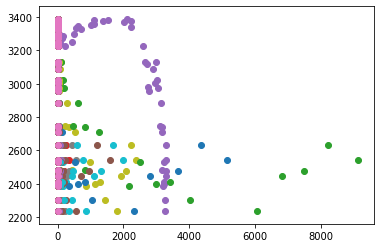

In [24]:
index_fund = smp_df
index_fund_name = "S&P500"

grouped_deaths =time_series_2019_ncov_Deaths.groupby('Country/Region').sum()
reduced_grouped_deaths =grouped_deaths.drop(columns = ['Lat','Long'])
reduced_grouped_deathsT = reduced_grouped_deaths.T
reduced_grouped_deathsT=reduced_grouped_deathsT.reset_index()
reduced_grouped_deathsT['index']=pd.to_datetime(reduced_grouped_deathsT['index'])

reduced_grouped_deathsT['Date']=reduced_grouped_deathsT['index']
reduced_grouped_deathsT.drop(columns=['index'])

merged_deaths = pd.merge(reduced_grouped_deathsT,index_fund,on='Date',how = 'inner')

country_list = []
corr_list = []
temp_deathsT = reduced_grouped_deaths.T
for name in temp_deathsT.columns:
    x_values = merged_deaths[name]
    y_values = merged_deaths['Close']
    correlation = st.pearsonr(x_values,y_values)
    plt.scatter(x_values,y_values)
    country_list.append(name)
    corr_list.append(round(correlation[0],2))
    
final_df = pd.DataFrame({'Country':country_list,
                        'Correlation':corr_list})
final_df=final_df[final_df['Correlation'].notna()]
final_df = final_df[final_df['Correlation']!="nan"]
f = final_df.sort_values('Correlation')
f =f.reset_index()
f.sort_values('Correlation').to_csv(f"cleaned_dataframes/{index_fund_name}_vs_deaths.csv")

### Correlation Recovered

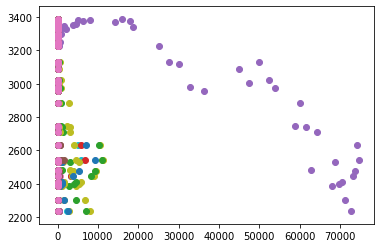

In [25]:
index_fund = smp_df
index_fund_name = "S&P500"

grouped_deaths =time_series_2019_ncov_Recovered.groupby('Country/Region').sum()
reduced_grouped_deaths =grouped_deaths.drop(columns = ['Lat','Long'])
reduced_grouped_deathsT = reduced_grouped_deaths.T
reduced_grouped_deathsT=reduced_grouped_deathsT.reset_index()
reduced_grouped_deathsT['index']=pd.to_datetime(reduced_grouped_deathsT['index'])

reduced_grouped_deathsT['Date']=reduced_grouped_deathsT['index']
reduced_grouped_deathsT.drop(columns=['index'])

merged_deaths = pd.merge(reduced_grouped_deathsT,index_fund,on='Date',how = 'inner')

country_list = []
corr_list = []
temp_deathsT = reduced_grouped_deaths.T
for name in temp_deathsT.columns:
    x_values = merged_deaths[name]
    y_values = merged_deaths['Close']
    correlation = st.pearsonr(x_values,y_values)
    plt.scatter(x_values,y_values)
    country_list.append(name)
    corr_list.append(round(correlation[0],2))
    
final_df = pd.DataFrame({'Country':country_list,
                        'Correlation':corr_list})
final_df=final_df[final_df['Correlation'].notna()]
final_df = final_df[final_df['Correlation']!="nan"]
f = final_df.sort_values('Correlation')
f =f.reset_index()
f.sort_values('Correlation').to_csv(f"cleaned_dataframes/{index_fund_name}_vs_recovered.csv")

### Correlation Confirmed

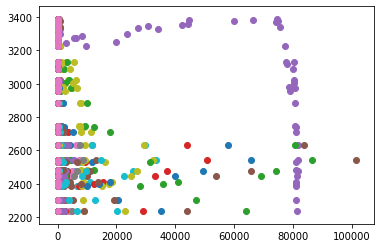

In [26]:
index_fund = smp_df
index_fund_name = "S&P500"

grouped_deaths =time_series_2019_ncov_Confirmed.groupby('Country/Region').sum()
reduced_grouped_deaths =grouped_deaths.drop(columns = ['Lat','Long'])
reduced_grouped_deathsT = reduced_grouped_deaths.T
reduced_grouped_deathsT=reduced_grouped_deathsT.reset_index()
reduced_grouped_deathsT['index']=pd.to_datetime(reduced_grouped_deathsT['index'])

reduced_grouped_deathsT['Date']=reduced_grouped_deathsT['index']
reduced_grouped_deathsT.drop(columns=['index'])

merged_deaths = pd.merge(reduced_grouped_deathsT,index_fund,on='Date',how = 'inner')

country_list = []
corr_list = []
temp_deathsT = reduced_grouped_deaths.T
for name in temp_deathsT.columns:
    x_values = merged_deaths[name]
    y_values = merged_deaths['Close']
    correlation = st.pearsonr(x_values,y_values)
    plt.scatter(x_values,y_values)
    country_list.append(name)
    corr_list.append(round(correlation[0],2))
    
final_df = pd.DataFrame({'Country':country_list,
                        'Correlation':corr_list})
final_df=final_df[final_df['Correlation'].notna()]
final_df = final_df[final_df['Correlation']!="nan"]
f = final_df.sort_values('Correlation')
f =f.reset_index()
f.sort_values('Correlation').to_csv(f"cleaned_dataframes/{index_fund_name}_vs_confirmed.csv")